# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression

* a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)  
* linear regression model prediction equation:  
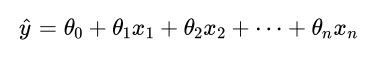  
* linear regression model prediction (vectorized form):  
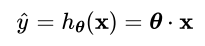

#### Generating linear-looking random data with y = 4 + 3x1 + Gaussian noise

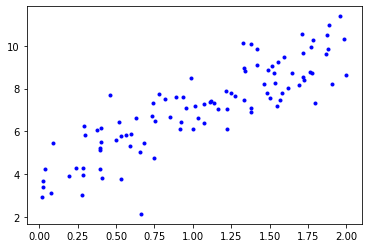

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")

#### Computing theta-hat(theta best) using Normal Equation:  
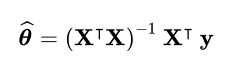

In [3]:
X_b = np.c_[np.ones((100, 1)), X]         # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

##### Actual **theta(0)**=4 & **theta(1)**=3 but the noise made it impossible to recover the exact parameters

In [4]:
theta_best

array([[3.86436143],
       [3.07654205]])

#### Making prdictions using theta-hat

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]      # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86436143],
       [10.01744553]])

#### Plotting the model's prediction

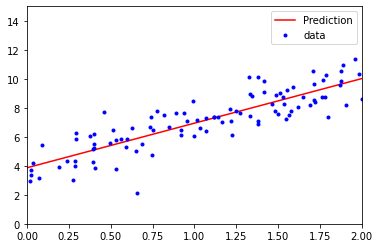

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(('Prediction', 'data'))

#### Performing Linear Regression using **Sklearn**

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [8]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86436143]), array([[3.07654205]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.86436143],
       [10.01744553]])

#### Numpy's least square method to compute Linear Regression using `np.linalg.lstsq()`
 
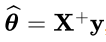

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86436143],
       [3.07654205]])

#### Applying Pseudoinverse directly using `np.linalg.pinv()`  
* pseudoinverse is computed using a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix **X** into the matrix multiplication of three matrices **U Σ V⊺**

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.86436143],
       [3.07654205]])